In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import cmdstanpy

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
audi_cars = pd.read_csv("data/audi_cars_data.csv")
list(audi_cars.columns)
audi_cars.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,5900.0,Used,Audi,100,2.0 E,C4 (1991-1994),1992,262000.0,101.0,1984.0,Gasoline
1,6900.0,Used,Audi,100,Avant 2.8 E,C4 (1991-1994),1991,332000.0,174.0,2771.0,Gasoline + LPG
2,5000.0,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,150.0,2598.0,Gasoline
3,19900.0,Used,Audi,100,NaN,C1 (1968-1976),1974,99000.0,115.0,1900.0,Gasoline
4,14999.0,Used,Audi,100,Avant 2.2,C3 (1982-1991),1987,108729.0,137.0,2226.0,Gasoline


In [3]:
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()

In [39]:
model = cmdstanpy.CmdStanModel(stan_file='test.stan')


INFO:cmdstanpy:compiling stan file /home/DA/project/test.stan to exe file /home/DA/project/test
INFO:cmdstanpy:compiled model executable: /home/DA/project/test


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


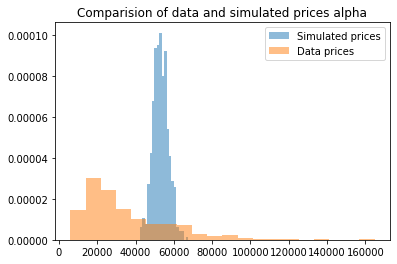

In [44]:
N = 532
data = {'N': N,
        'x1': np.array([np.random.normal(2000, 25000) for _ in range(N)]),
        'x2': np.array([np.random.normal(2009, 2) for _ in range(N)]),
        }
sim=model.sample(data=data)
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'y_generated[1]':'y_generated[523]'].values
plt.figure()
plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title(f'Comparision of data and simulated prices alpha')
plt.show()